# (5) Perceptrons, logic gates, and the need for larger artificial neural networks

## introduction to machine learning for materials science

The single-neuron perceptron is only capable of classifying two linearly separable classes, i.e. two sets of data points that can be divided by a (hyper)plane. This is intuitively easy to understand as the weights and bias of the perceptron with only one neuron can only span one single plane that divides space into two decision regions. Here we will show how a network with more neurons can separate more than two classes.

[Logic gates](https://en.wikipedia.org/wiki/Logic_gate) are a devices that perform Boolean operations. In simple terms, a binary input $\{0, 1\}$ is mapped onto a single-value output, also of value $0$ or $1$. $0$ and $1$ can be interpreted as *false*/*true*. They can be physically implemented in devices such as transistors, where $0$ could be no current flowing, the *off*-state, and $1$ as the *on*-state with current flowing through the device. Typical examples are *AND* and *OR* operations, which are best explained with the help of truth tables. The *AND*-operation returns the value $1$ only when the two inputs $X1$ and $X2$ equal $1$, and $0$ otherwise. The *OR*-operation returns $1$ already of any one of the two inputs equals $1$, and $0$ only if both inputs are $0$. 

These operations can be graphically visualized with the x-axis taking the values of $X1$ and the y-axis the values of $X2$. The truth-value of the output can be color-coded. In the following, orange demarks the value $0$ and blue the value $1$ of the output.


| X1 | X2  | AND |
|:---|:---:| ------:|
| 0  | 0   | 0      |
| 0  | 1   | 0      |
| 1  | 0   | 0      |
| 1  | 1   | 1      |


| X1 | X2  | OR |
|:---|:---:| ------:|
| 0  | 0   | 0      |
| 0  | 1   | 1      |
| 1  | 0   | 1      |
| 1  | 1   | 1      |


The *AND*-operation returns the value $1$ only when the two inputs $X1$ and $X2$ equal $1$, and $0$ otherwise. The *OR*-operation returns $1$ already of any one of the two inputs equals $1$, and $0$ only if both inputs are $0$. 

These operations can be graphically visualized with the x-axis taking the values of $X1$ and the y-axis the values of $X2$. The truth value of the output can be color coded. In the following, orange demarks the value $0$ and blue the value $1$ of the output.

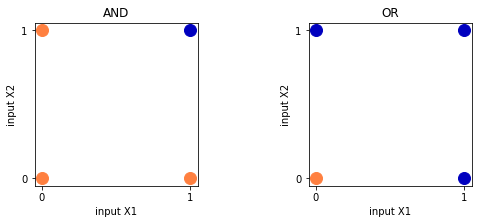

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

X_AND = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y_AND = np.array([0, 0, 0, 1])

X_OR = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y_OR = np.array([0, 1, 1, 1])


plt.figure(figsize=(9, 3))

plt.subplot(121)
for i in range(4):
    plt.plot(X_AND[i,0], X_AND[i,1], 'o', markersize=12, 
             c=np.where(y_AND[i]<1,(1.0, 0.5, 0.25, 1.0),(0.0, 0.0, 0.75, 1.0)))
    i = i+1

    plt.gca().set_aspect('equal')
plt.xticks((0,1))
plt.yticks((0,1))
plt.title('AND')
plt.xlabel('input X1')
plt.ylabel('input X2')


plt.subplot(122)
for i in range(4):
    plt.plot(X_OR[i,0], X_OR[i,1], 'o', markersize=12, 
             c=np.where(y_OR[i]<1,(1.0, 0.5, 0.25, 1.0),(0.0, 0.0, 0.75, 1.0)))
    i = i+1
plt.gca().set_aspect('equal')
plt.xticks((0,1))
plt.yticks((0,1))
plt.title('OR')
plt.xlabel('input X1')
plt.ylabel('input X2')

plt.show()

It is obvious that the $\{0,1\}$ output values can be separated by a straight line, so a perceptron should be able to learn this (decision) boundary automatically. The following code will just do this, find the weights and bias such that the perceptron can classify the input and returns the desired mapping of *AND* or *OR*. The perceptron thus acts as a binary logic gate.

In [2]:
#defining helper functions for later use

import numpy as np

#the function 'initialize_weights' sets the parameters w, b to random number close to zero
#slightly modified, the weight vector w is now defined as a column vector.

def initialize_weights(dim):
    np.random.seed()
    w = np.random.randn(dim, 1)*0.01
    b = 0
    return w, b

#the function 'forward' calculates w*X+b, the weighted sum, which ideally should be equal to y.
#also slightly modified, before calculating the dot product of w and X, w needs to be transposed into a row vector

def forward(X_,w_,b_):
    Z = np.dot(w_.T,X_)+b_
    return Z

#using the Sigmoid function as activation function
#this function is new and will be used in the classifier perceptron

def activation(Z):
    A = 1/(1+np.exp(-Z))
    return A

#a function that maps an input to the binary classifier 0 or 1
#since the output of the sigmoid function is not strictly 0 or 1, we pass it through this function
#if the output of the sigmoid function is closer to zero, then 0 is returned. if it is closer to one, 1 is returned.
def predict(A):
    pred = 1.0 if A >= 0.5 else 0.0
    return pred

And here comes the perceptron code as used previously.

In [3]:
def perceptron_classifier(X, y, eta, n_epochs):
    
    #first thing is to initialize the parameter w and b.
    #this is done calling the external function 'initialize_weights'
    
    w, b = initialize_weights(X.shape[1])
    
    #loop over the number of training cylces (n_epochs)
    for epoch in range(n_epochs):
        sum_error = 0.0
        
        #loop over all datapoints
        for i in range(X.shape[0]):
            
            #calling the prediction function 'forward' which calculates w*X+b and storing this in the variable 'prediction'
            predicted_value = predict(activation(forward(X[i], w, b)))
            
            #calculating the prediciton error as the difference between the datapoint y and the estimate (w*X+b) 
            error = y[i]-predicted_value
            
            #calculating the total error as the sum of squared error of each datapoint
            sum_error = sum_error + error**2
            
            #the follwoing lines are the learning part, where the parameter w & b get updated.
            #according to Rosenblatt's rules, b and w get updated once in each epoch for each data point
            #the for loop over j cycles through the dimension of the data, here 2 since we have y=f(x1,x2)
            
            b = b + eta * error
            for j in range(X.shape[1]):
                w[j] = w[j] + eta * error * X[i][j]
                
            #end of learning section    
                
        #printing the total error of each epoch        
        print('>epoch=%d, error=%.3f' % (epoch, sum_error))
        
    return w, b

Here comes the new code. The inputs $X$ and outputs $y$ have been defined above for plotting. The four states of $X$ and their correspondingly mapped output of the *AND* gate are used to train the perceptron and find the decision boundary. Ideally, a straight line clearly dividing orange and blue dots is learned and plotted. Each training results in a slightly different line, but the training should always be successful. 

>epoch=0, error=2.000
>epoch=1, error=3.000
>epoch=2, error=2.000
>epoch=3, error=3.000
>epoch=4, error=2.000
>epoch=5, error=1.000
>epoch=6, error=0.000
>epoch=7, error=0.000
>epoch=8, error=0.000
>epoch=9, error=0.000
(array([[0.18176703],
       [0.20444245]]), -0.30000000000000004)


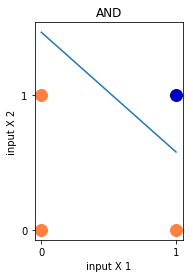

In [16]:
#learning parameters
eta = 0.1
n_epochs = 10

#training the percpetron on the AND-gate
weights_and = perceptron_classifier(X_AND, y_AND, eta, n_epochs)

#printing the learned parameters (weights and bias)
print(weights_and)

#plotting section 
xtest = np.linspace(0,1,10)
ytest = -1/weights_and[0][1] * (weights_and[0][0]*xtest + weights_and[1])

plt.plot(xtest,ytest)

for i in range(4):
    plt.plot(X_AND[i,0], X_AND[i,1], 'o', markersize=12, 
             c=np.where(y_AND[i]<1,(1.0, 0.5, 0.25, 1.0),(0.0, 0.0, 0.75, 1.0)))
             #c=np.where(predict(activation(weights_and[0][0]*X_AND[i,0]+weights_and[0][1]*X_AND[i,1]+weights_and[1]))<0.5,(1.0, 0.5, 0.25, 1.0),(0.0, 0.0, 0.75, 1.0)))
    i = i+1
       
plt.gca().set_aspect('equal')
plt.xticks((0,1))
plt.yticks((0,1))
plt.title('AND')
plt.xlabel('input X 1')
plt.ylabel('input X 2')

plt.show()

We can do the same for the *OR* gate.

>epoch=0, error=3.000
>epoch=1, error=1.000
>epoch=2, error=2.000
>epoch=3, error=2.000
>epoch=4, error=1.000
>epoch=5, error=0.000
>epoch=6, error=0.000
>epoch=7, error=0.000
>epoch=8, error=0.000
>epoch=9, error=0.000
(array([[0.1905124 ],
       [0.19493234]]), -0.1)


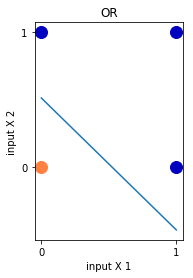

In [17]:
#training the percpetron on the OR-gate
weights_or = perceptron_classifier(X_OR, y_OR, eta, n_epochs)

#printing the learned parameters (weights and bias)
print(weights_or)

#plotting section
xtest = np.linspace(0,1,10)
ytest = -1/weights_or[0][1] * (weights_or[0][0]*xtest + weights_or[1])

plt.plot(xtest,ytest)

for i in range(4):
    plt.plot(X_OR[i,0], X_OR[i,1], 'o', markersize=12, 
             c=np.where(y_OR[i]<1,(1.0, 0.5, 0.25, 1.0),(0.0, 0.0, 0.75, 1.0)))
    i = i+1
    
plt.gca().set_aspect('equal')
plt.xticks((0,1))
plt.yticks((0,1))
plt.title('OR')
plt.xlabel('input X 1')
plt.ylabel('input X 2')

plt.show()

A multitude of different logic gates exist, with different mapping of input to output values. One more linearly separable examples are the *NAND* gate, which is the negation of the *AND* gate, i.e. all output values are flipped.

>epoch=0, error=2.000
>epoch=1, error=2.000
>epoch=2, error=3.000
>epoch=3, error=2.000
>epoch=4, error=2.000
>epoch=5, error=3.000
>epoch=6, error=2.000
>epoch=7, error=1.000
>epoch=8, error=0.000
>epoch=9, error=0.000
(array([[-0.17981107],
       [-0.20690144]]), 0.30000000000000004)


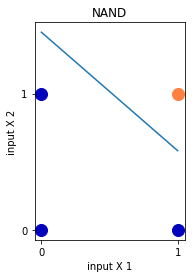

In [19]:
#defining NAND in- and output
X_NAND = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y_NAND = np.array([1, 1, 1, 0])

#training the percpetron on the NAND-gate
weights_nand = perceptron_classifier(X_NAND, y_NAND, eta, n_epochs)

#printing the learned parameters (weights and bias)
print(weights_nand)

#plotting section
xtest = np.linspace(0,1,10)
ytest = -1/weights_nand[0][1] * (weights_nand[0][0]*xtest + weights_nand[1])

plt.plot(xtest,ytest)

for i in range(4):
    plt.plot(X_NAND[i,0], X_NAND[i,1], 'o', markersize=12, 
             c=np.where(y_NAND[i]<1,(1.0, 0.5, 0.25, 1.0),(0.0, 0.0, 0.75, 1.0)))
    i = i+1
    
plt.gca().set_aspect('equal')
plt.xticks((0,1))
plt.yticks((0,1))
plt.title('NAND')
plt.xlabel('input X 1')
plt.ylabel('input X 2')

plt.show()

But not all logic gates can be modelled by a single-neuron perceptron. The *XOR* gate, which returns $1$ if only one of the two inputs is $1$, and $0$ otherwise, cannot be learned by the perceptron. After the plot below the expectation values and the predicted values are printed. These do never fully coincide. Even training longer by changing the number of epochs or chaning the learning rate does not improve the situation.

| X1 | X2  | XOR |
|:---|:---:| ------:|
| 0  | 0   | 0      |
| 0  | 1   | 1      |
| 1  | 0   | 1      |
| 1  | 1   | 0      |

>epoch=0, error=3.000
>epoch=1, error=3.000
>epoch=2, error=4.000
>epoch=3, error=4.000
>epoch=4, error=4.000
>epoch=5, error=4.000
>epoch=6, error=4.000
>epoch=7, error=4.000
>epoch=8, error=4.000
>epoch=9, error=4.000
(array([[ 0.0277845],
       [-0.0951663]]), 0.0)


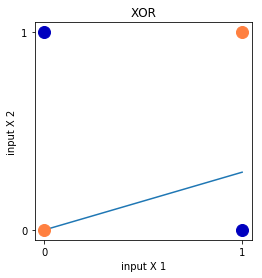

expected value: 0, predicted value: 1
expected value: 1, predicted value: 1
expected value: 1, predicted value: 0
expected value: 0, predicted value: 0


In [20]:
#defining XOR in- & output
X_XOR = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y_XOR = np.array([0, 1, 1, 0])

#learning parameters
eta = 0.1
n_epochs = 10

#training the percpetron on the XOR-gate
weights_xor = perceptron_classifier(X_XOR, y_XOR, eta, n_epochs)

#printing the learned parameters (weights and bias)
print(weights_xor)

#plotting section
xtest = np.linspace(0,1,10)
ytest = -1/weights_xor[0][1] * (weights_xor[0][0]*xtest + weights_xor[1])

plt.plot(xtest,ytest)

for i in range(4):
    plt.plot(X_XOR[i,0], X_XOR[i,1], 'o', markersize=12, 
             c=np.where(y_XOR[i]<1,(1.0, 0.5, 0.25, 1.0),(0.0, 0.0, 0.75, 1.0)))
    i = i+1
    
plt.gca().set_aspect('equal')
plt.xticks((0,1))
plt.yticks((0,1))
plt.title('XOR')
plt.xlabel('input X 1')
plt.ylabel('input X 2')

plt.show()

#printing expectated and predicted values
for i in range(4):
    print('expected value: %d, predicted value: %d' %(y_XOR[i], predict(activation(weights_xor[0][0]*X_XOR[i,0]+weights_xor[0][1]*X_XOR[i,1]+weights_xor[1]))))

Maybe our implementation of the perceptron is flawed. We can fall back onto established and tested implementations of the [perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) in the *scikit learn* package and run the training again on the *XOR* gate to see whether the training is improved.

[[ 0. -1.]]
[0.]


C:\Users\gutzler\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


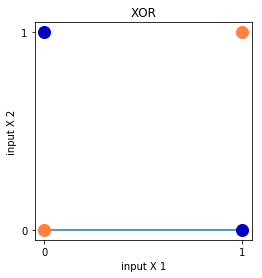

expected value: 0, predicted value: 0
expected value: 1, predicted value: 0
expected value: 1, predicted value: 0
expected value: 0, predicted value: 0


In [21]:
#importing the Perceptron model
from sklearn.linear_model import Perceptron

#calling the perceptron function and fitting it on the XOR data
#the model's parameters (weights, etc.) are stored in model_xor
sk_perceptron = Perceptron()
model_xor = sk_perceptron.fit(X_XOR, y_XOR)


#plotting section. the weights and bias values are called using model_xor.coef_ and model_xor.intercept_
xtest = np.linspace(0,1,10)
ytest = -1/model_xor.coef_[0][1] * (model_xor.coef_[0][0]*xtest + model_xor.intercept_)

print(model_xor.coef_)
print(model_xor.intercept_)
plt.plot(xtest,ytest)
for i in range(4):
    plt.plot(X_XOR[i,0], X_XOR[i,1], 'o', markersize=12, 
             c=np.where(y_XOR[i]<1,(1.0, 0.5, 0.25, 1.0),(0.0, 0.0, 0.75, 1.0)))
             
    i = i+1
plt.gca().set_aspect('equal')
plt.xticks((0,1))
plt.yticks((0,1))
plt.title('XOR')
plt.xlabel('input X 1')
plt.ylabel('input X 2')

plt.show()

for i in range(4):
    print('expected value: %d, predicted value: %d' %(y_XOR[i], model_xor.predict(X_XOR)[i]))

This does not improve the result. The reason why this does not work is clear; it is not possible to separate the orange and blue points by one plane/line. But the perceptron with one neuron only is capable of 'generating' one plane, and the model is doomed to fail.

The **Perceptron()** function has several parameters that can be adjusted but none of these will improve the classification. It also uses different learning rules than the ones specified in our model and different ways to minimize the difference between expected and predicted values. See the documentation for more [information](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). 

In order to improve the prediction for the XOR gate, or, in general, to classify more than two classes of data, we can add more neurons to the network. To modify our perceptron model for this includes significant work, which we can skip by falling back onto the **MLPClassifier()** [function](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) from *scikit learn*. This model is adjustable in that we can add more neurons, both to the same layer and to additional layers. This is best explained with the following figure:

<br>
<img src="./images/MLperceptron.svg" width="500" />
<br>

This network has $n$ input features, $m$ output labels, $i$ so-called hidden layers, each hidden layer containing a different number of neurons. The more neurons, the more complex tasks can be tackled with such an artificial neural network. More information can be found [here](https://scikit-learn.org/stable/modules/neural_networks_supervised.html).

For modelling the *XOR* gate, we can do with only one hidden layer with two neurons. This will give us two times two weights and two bias terms. From these we can construct two planes that separate the *XOR* data points such that blue and orange dots are in different decision domains. The network looks something like this:

<br>
<img src="./images/perceptron_xor.svg" width="300" />
<br>

The following code implements this model with one hidden layer with two neurons.

In [25]:
#importing model from scikitlearn
from sklearn.neural_network import MLPClassifier

#defining the model
#hidden_layer_sizes tells the model how many hidden layers with how many neurons to use. (2,) is one hidden layer with two neuron, (3,5) is two hidden layers, one with 3 and one with 5 neurons.
#activation tells the model which activation function to use, here the sigmoid function
MLP_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=500)

model_xor = MLP_xor.fit(X_XOR, y_XOR)

There is a bunch of parameters in the **MLPClassifier** function that can be tuned to optimize learning, see the next cell. Again, check out the *scikit learn* site for more information.

In [26]:
print(model_xor)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


Comparing expected with predicted values:

In [27]:
for i in range(4):
    print('expected value: %d, predicted value: %d' %(y_XOR[i], model_xor.predict(X_XOR)[i]))

expected value: 0, predicted value: 0
expected value: 1, predicted value: 1
expected value: 1, predicted value: 1
expected value: 0, predicted value: 0


With the larger network we also have more weights $w$ and bias terms $b$. These can be accessed through calling `coefs_`, which returns the weights between the layers, and `intercepts_`, which returns the bias terms.

In [28]:
print(model_xor.coefs_)
print(model_xor.intercepts_)

[array([[-6.16387229, -6.52235471],
       [ 6.00432547,  6.88896574]]), array([[-14.68595556],
       [ 14.37008448]])]
[array([ 3.5954382 , -4.00876876]), array([7.49808037])]


Taking the weights and bias terms between the input layer and the hidden layer allows for plotting the decision boundaries. This also helps to understand how a two-neuron perceptron can classify the *XOR* gate: one neuron separates one blue dot from the two orange dots (and the other blue dot). The second neuron separates the the orange dots (and the first blue dot) from the last blue dot. 

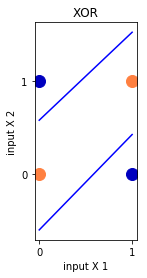

In [29]:
xtest = np.linspace(0,1,5)
ytest1 = -1/model_xor.coefs_[0][1][0] * (model_xor.coefs_[0][0][0]*xtest + model_xor.intercepts_[0][0])
ytest2 = -1/model_xor.coefs_[0][1][1] * (model_xor.coefs_[0][0][1]*xtest + model_xor.intercepts_[0][1])
ytest3 = -1/model_xor.coefs_[1][1] * (model_xor.coefs_[1][0]*xtest + model_xor.intercepts_[1])

#print(model_xor.coef_)
#print(model_xor.intercept_)
plt.plot(xtest,ytest1, c='b')
plt.plot(xtest,ytest2, c='b')
#plt.plot(xtest,ytest3, c='g')
for i in range(4):
    plt.plot(X_XOR[i,0], X_XOR[i,1], 'o', markersize=12, 
             c=np.where(y_XOR[i]<1,(1.0, 0.5, 0.25, 1.0),(0.0, 0.0, 0.75, 1.0)))
             
    i = i+1
plt.gca().set_aspect('equal')
plt.xticks((0,1))
plt.yticks((0,1))
plt.title('XOR')
plt.xlabel('input X 1')
plt.ylabel('input X 2')

plt.show()

More neurons and more hidden layers give greater flexibility to address more complex problems. This is at the heart of deep learning, the part of machine learning in which artificial neural networks with more than one or two hidden layers are used.